In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
dataset = pd.read_csv('Spam SMS Collection', sep='\t', names=['label', 'message'])


## EDA(Exploratory Data Analysis)

In [3]:
dataset.shape


(5572, 2)

In [4]:
dataset.columns


Index(['label', 'message'], dtype='object')

In [5]:
dataset.dtypes


label      object
message    object
dtype: object

In [6]:
dataset.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
dataset.describe(include='object')


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
## No Nan in the dataset

In [13]:
# Mapping values for label
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})


In [14]:
dataset.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
dataset.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [23]:
from collections import Counter

In [25]:
print("Count of ham vs spam {}".format(Counter(dataset['label'])))

Count of ham vs spam Counter({0: 4825, 1: 747})


In [16]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Total Ham messages: 4825
Total Spam messages: 747


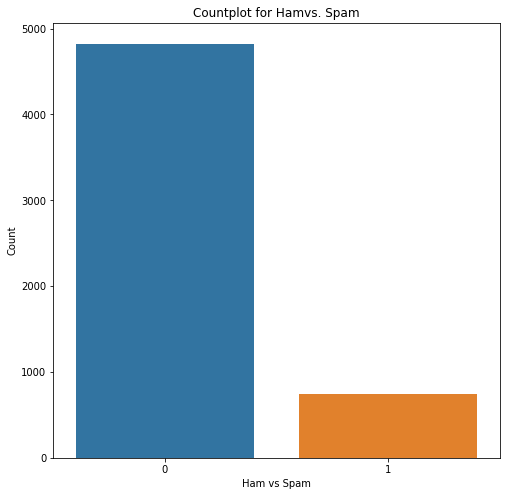

In [21]:
# Countplot for Spam vs. Ham 
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=dataset)
p = plt.title('Countplot for Hamvs. Spam')
p = plt.xlabel('Ham vs Spam')
p = plt.ylabel('Count')

ham,spam=dataset['label'].value_counts()

print("Total Ham messages: {}".format(ham))
print("Total Spam messages: {}".format(spam))


In [30]:
X=dataset['message']
y=dataset['label']

In [33]:
X.shape,y.shape

((5572,), (5572,))

#### It is Clear from the above figure that dataset is imbalance 

## Feature Engineering

Doing Oversampling to balance the spam and ham label ratio

In [27]:
from imblearn.combine import SMOTETomek


In [36]:
# Handling imbalanced dataset using Oversampling
only_spam = dataset[dataset['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(dataset.shape[0]-only_spam.shape[0]))


Number of Spam records: 747
Number of Ham records: 4825


In [38]:
count = int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
    dataset= pd.concat([dataset, only_spam])

dataset.shape


(9307, 2)

Total Ham messages: 4825
Total Spam messages: 4482


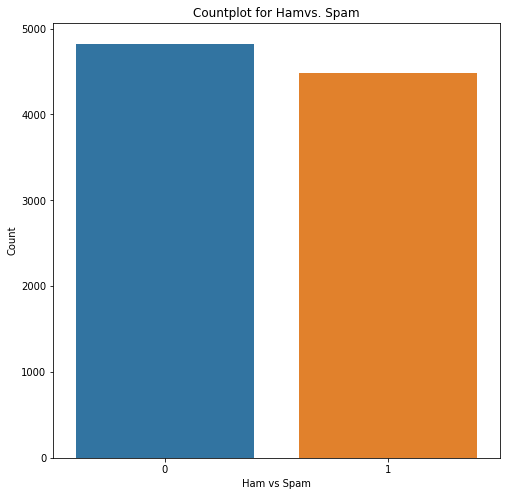

In [39]:
# Countplot for Spam vs. Ham  after Oversampling
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=dataset)
p = plt.title('Countplot for Hamvs. Spam')
p = plt.xlabel('Ham vs Spam')
p = plt.ylabel('Count')

ham,spam=dataset['label'].value_counts()

print("Total Ham messages: {}".format(ham))
print("Total Spam messages: {}".format(spam))


## Data Cleaning

1. Removing special character and numbers using regular expression
2. Converting the entire sms into lower case
3. Tokenizing the sms by words
4. Removing the stop words
5. Lemmatizing the words
6. Joining the lemmatized words
7. Building a corpus of messages


In [43]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [45]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(dataset.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

    

In [46]:
#after cleaning the data 1 to 10 sentences
corpus[0:10]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free']

In [48]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()  #top 500 features

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = dataset['label']


In [49]:
X.head()

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [51]:
print("Independent Feature {}".format(X.shape))
print("Dependent Feature {}".format(y.shape))

Independent Feature (9307, 500)
Dependent Feature (9307,)


## Model Building 

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
print("Size of X_trian: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of y_trian: {}".format(y_train.shape))
print("Size of y_test: {}".format(y_test.shape))

Size of X_trian: (7445, 500)
Size of X_test: (1862, 500)
Size of y_trian: (7445,)
Size of y_test: (1862,)


### Multinomial Naive Bayes

In [57]:
# Fitting Naive Bayes for cross val score for maximum and minimum value of model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv_score = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print("--- Average F1-Score for MNB model: {} ---".format(round(cv_score.mean(), 3)))
print("Standard Deviation: {}".format(round(cv_score.std(), 3)))


--- Average F1-Score for MNB model: 0.943 ---
Standard Deviation: 0.004


In [58]:
#for minimum and maximum value of the model
cv_score

array([0.93986637, 0.94314381, 0.94369369, 0.94983278, 0.9452514 ,
       0.93854749, 0.93406593, 0.94394619, 0.9415656 , 0.94606742])

In [59]:
# Classification report for MNB model on training and testing data
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



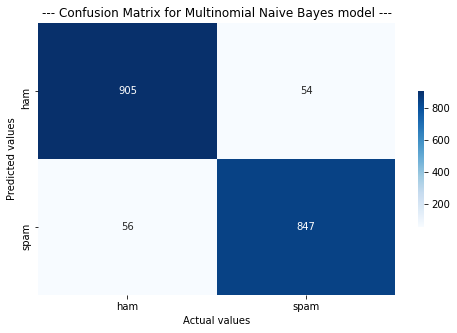

In [60]:
# Confusion matrix of MNB model on training and testing dataset
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')


### Decision Tree Classifier

In [64]:
# Fitting Decision Tree Classifier to the entire dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_dt = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv_dt.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_dt.std(), 3)))


--- Average F1-Score for Decision Tree model: 0.981 ---
Standard Deviation: 0.004


In [65]:
# for minimum and maximum accuracy of the model
cv_dt

array([0.98245614, 0.9791438 , 0.98781838, 0.97816594, 0.98237885,
       0.97821351, 0.97811816, 0.97486339, 0.98138007, 0.98563536])

In [66]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))


--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



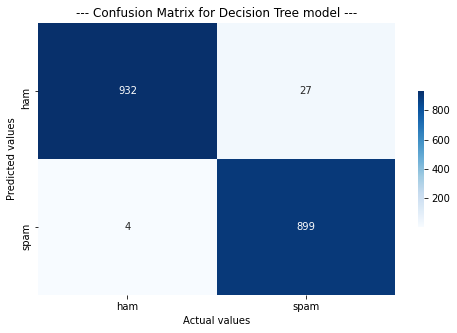

In [67]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')


### Random Forest Classifier

In [89]:
# Fitting Random Forest to the Entire dataset for the cross val score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv_rf = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv_rf.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_rf.std(), 3)))


--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.002


In [90]:
cv_rf

array([0.99445061, 0.99331849, 0.99664804, 0.99224806, 0.99331849,
       0.9944629 , 0.99554566, 0.99111111, 0.99666296, 0.99331849])

In [91]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))


--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



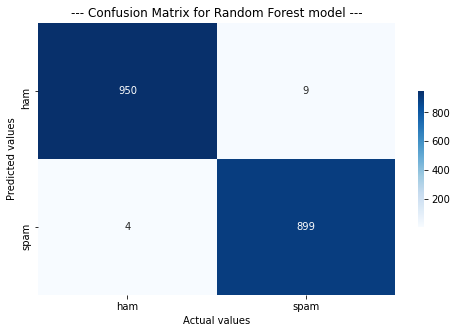

In [92]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')


In [73]:
## Selecting Decision Tree Classifier and Multinomial Naive Bayes for Voting Classifier
## Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv_voting = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv_voting.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv_voting.std(), 3)))


--- Average F1-Score for VotingClassifier model: 0.98 ---
Standard Deviation: 0.004


##### Voting Classifier didnt outperform the Random Forest classifier so Random Forest Classifier would be our model for prediction

## Making Prediction Using Random Forest Classifier

In [74]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)


In [75]:
# Prediction 1 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
    print('Gotcha!! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


This is a HAM (normal) message.


In [76]:
# Predicting values 2 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
    print('Gotcha!! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.


In [77]:
# Prediction 3 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha!! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Gotcha!! This is a SPAM message.


In [78]:
# Prediction 4 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('Gotcha!! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


This is a HAM (normal) message.


### Saving Model for Web App



In [85]:
import pickle


In [93]:
# file name
file = open('rf_model_for_app.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)
